# OCaml User Survey Analysis 
--------------------------------------------

Some simple analysis of the OCaml User Survey 2020. I am no data-scientist nor a python developer (where are my types :'( ) so take all of this with a pinch of salt and double-check my code!

For the most part this analysis is really about uncovering the differences in terms of **proficiency** and **years spent using OCaml**. Do experts care as much about documentation or does **everybody want multi-core!** Let's find out :))

**WARNING: many graphs ahead, but all relatively simple to digest**

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("ocs.csv")

### Filtering by Experience and Proficiency 

The first interesting thing I thought to have a look at was what does the community want when we filter by experience and self-perceived "expertise". Is it the case that *beginners* also crave **multicore** as much as everyone else. Do people with less than a year's experience want better documents or the *state of the art* website. Let's see!

In [3]:
years_of_ocaml = "For how long have you been using OCaml?"
# Ignoring blanks and 'you are not using OCaml' for these ones
year_vals = ["less than 1 year", "2-5 years", "5-10 years", "more than 10 years"]
installation = "Which installation methods do you use?"
welcome = "I feel welcome in the OCaml community"
lib_doc = "OCaml libraries are well documented."
impl = "Which of these language implementations are you actively using?"
proficiency = "How do you rate your OCaml proficiency?" 
pain_point = "What is a pain point when learning the OCaml language?"
new_feature = "If I was granted one new language feature today, I would ask for:"
state_of_the_art = "If one piece of the ecosystem could magically be made state-of-the-art, I would ask for:"
langs = "Which of these other programming languages are you fluent in?"
domains = "Which types of software do you develop with OCaml?"

def filter(df, col, value): 
    f = df[col] == value
    return df[f]

def totals_and_proportions(df, col): 
    print("Totals")
    print(df[col].value_counts())

    print("\nProportions")
    print(df[col].value_counts(normalize=True))

In [4]:
def plot(df, col, values, plot_col, title_prefix, ylabel="", normalize=True, drop=0):
    cols = 2 
    rows = len(values) / cols 
    fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
    for r in range(rows):
        for c in range(cols): 
            ax = axs[r, c]
            value = values[r * cols + c]
            ax.set_xticklabels([], ha='right')
            ax.set_ylabel(ylabel)
            filter(df, col, value)[plot_col].value_counts(normalize=normalize)[df[plot_col].value_counts() >= drop].plot.bar(rot=45, title=title_prefix + value, ax=ax, fontsize=12, colormap="autumn")
            labels = [l.get_text() for l in ax.get_xticklabels()]
            ax.set_xticklabels(labels, ha='right')
    plt.tight_layout ()
    plt.show()

### Poking around the Data
----------------------------
This first section is exploratory in that we'll just look at some counts and some correlations to get an idea of the data. First of all what is the spread of proficiency for the survey?

In [5]:
totals_and_proportions(df, proficiency)

Totals
advanced        262
intermediate    255
expert          110
beginner        110
Name: How do you rate your OCaml proficiency?, dtype: int64

Proportions
advanced        0.355495
intermediate    0.345997
expert          0.149254
beginner        0.149254
Name: How do you rate your OCaml proficiency?, dtype: float64


There's much more representation for the middle-chunk of people, but how does this reflect with how long people have been using OCaml?

In [6]:
totals_and_proportions(df, years_of_ocaml)

Totals
2-5 years                  273
more than 10 years         166
less than 1 year           148
5-10 years                 128
you are not using OCaml     26
Name: For how long have you been using OCaml?, dtype: int64

Proportions
2-5 years                  0.368421
more than 10 years         0.224022
less than 1 year           0.199730
5-10 years                 0.172740
you are not using OCaml    0.035088
Name: For how long have you been using OCaml?, dtype: float64


Ignoring the missing *1-2 years* category where I would assume people would round up or down, there is much more representation for... older... OCaml programmers. This likely impacts things like "New features" when looking at it from a holistic point of view (i.e. not subdiving by proficiency). 

Communities can sometime take care of users better depending on their proficiency. The next graph shows how different users with different proficiency feel welcomed in the OCaml community. Overall I would say it is fairly good, with perhaps a slight bias towards expert users. There are still enough *disgrees* to warrant some more community investigation I think. 

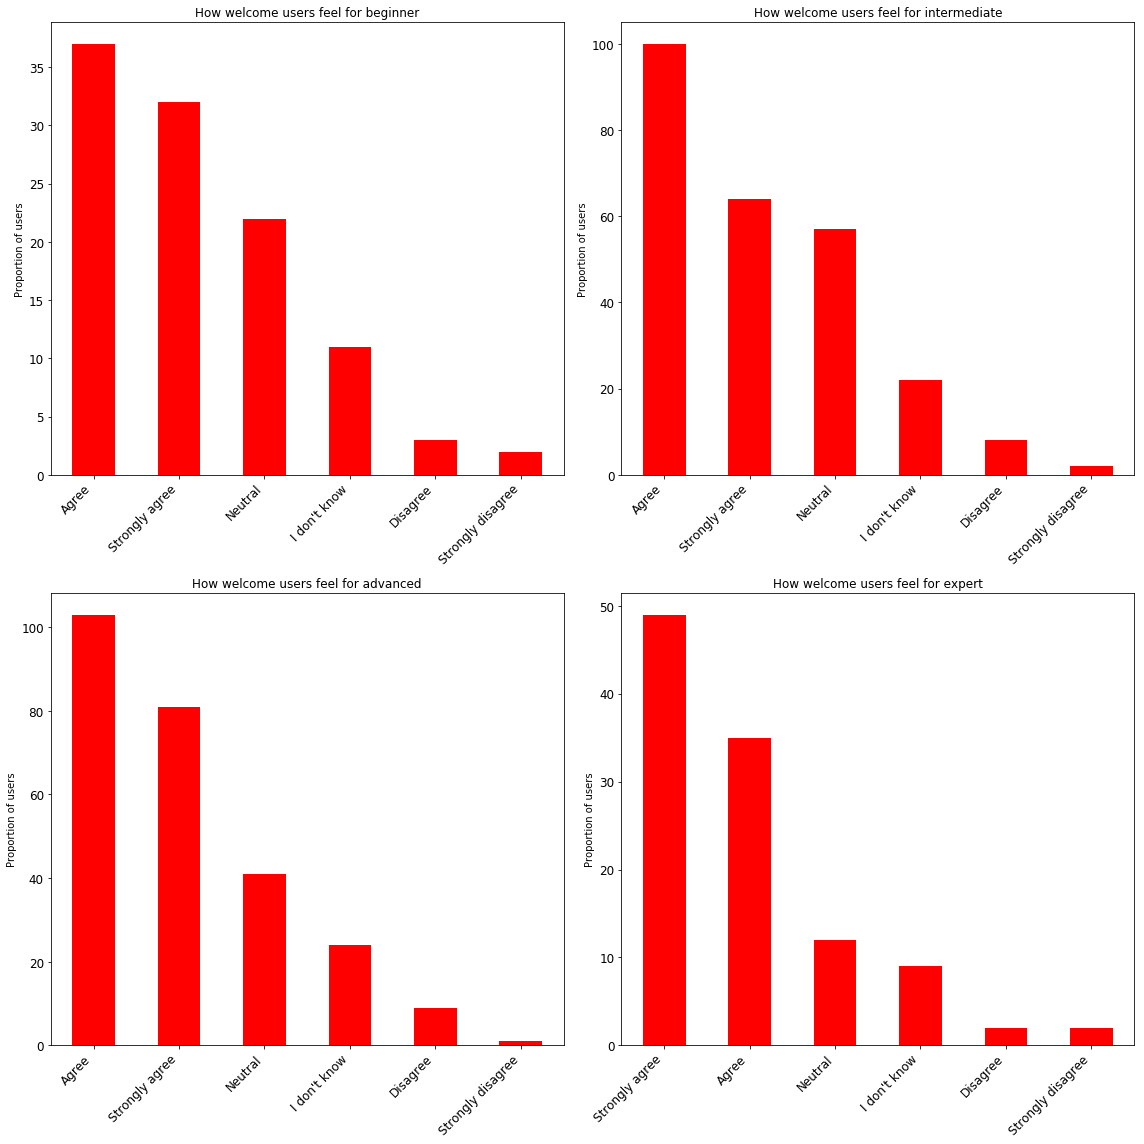

In [7]:
plot(df, proficiency, ["beginner", "intermediate", "advanced", "expert"], welcome, "How welcome users feel for ", ylabel="Proportion of users", normalize=False)

### State of the Art

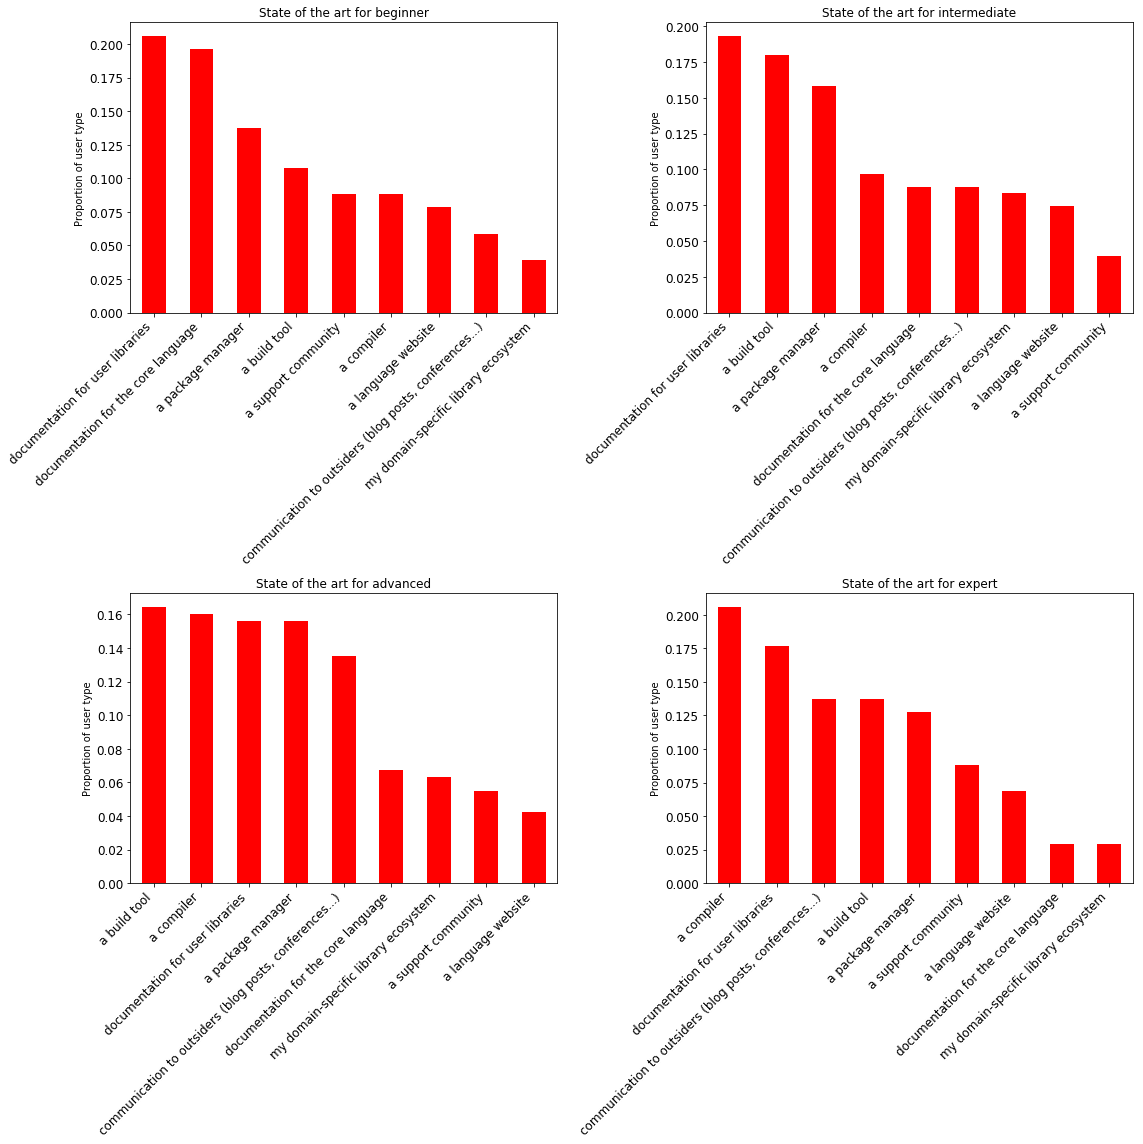

In [8]:
ylabel = "Proportion of user type"
plot(df, proficiency, ["beginner", "intermediate", "advanced", "expert"], state_of_the_art, "State of the art for ", ylabel)

Different, more useful, patterns emerge from the data when filtered by user type (*beginner, intermediate, advanced and expert*). Some of the key points include: 

 - **Documentation for user libraries** is top 3 for all of the different users 
 - More proficient users care more about **build tools and compiler**, whereas less proficient users care about documentation a little more 
 - **Documentation for the core language progressively moves further and further down the list**, one possible interpretation of this is that people eventually learn the language but at the start it would be nicer to have a better way to do it. Perhaps the "learning OCaml" journey is too difficult at the moment. 
 
In fact let's see how users feel about how well libraries are documented when split across these categories as well. 

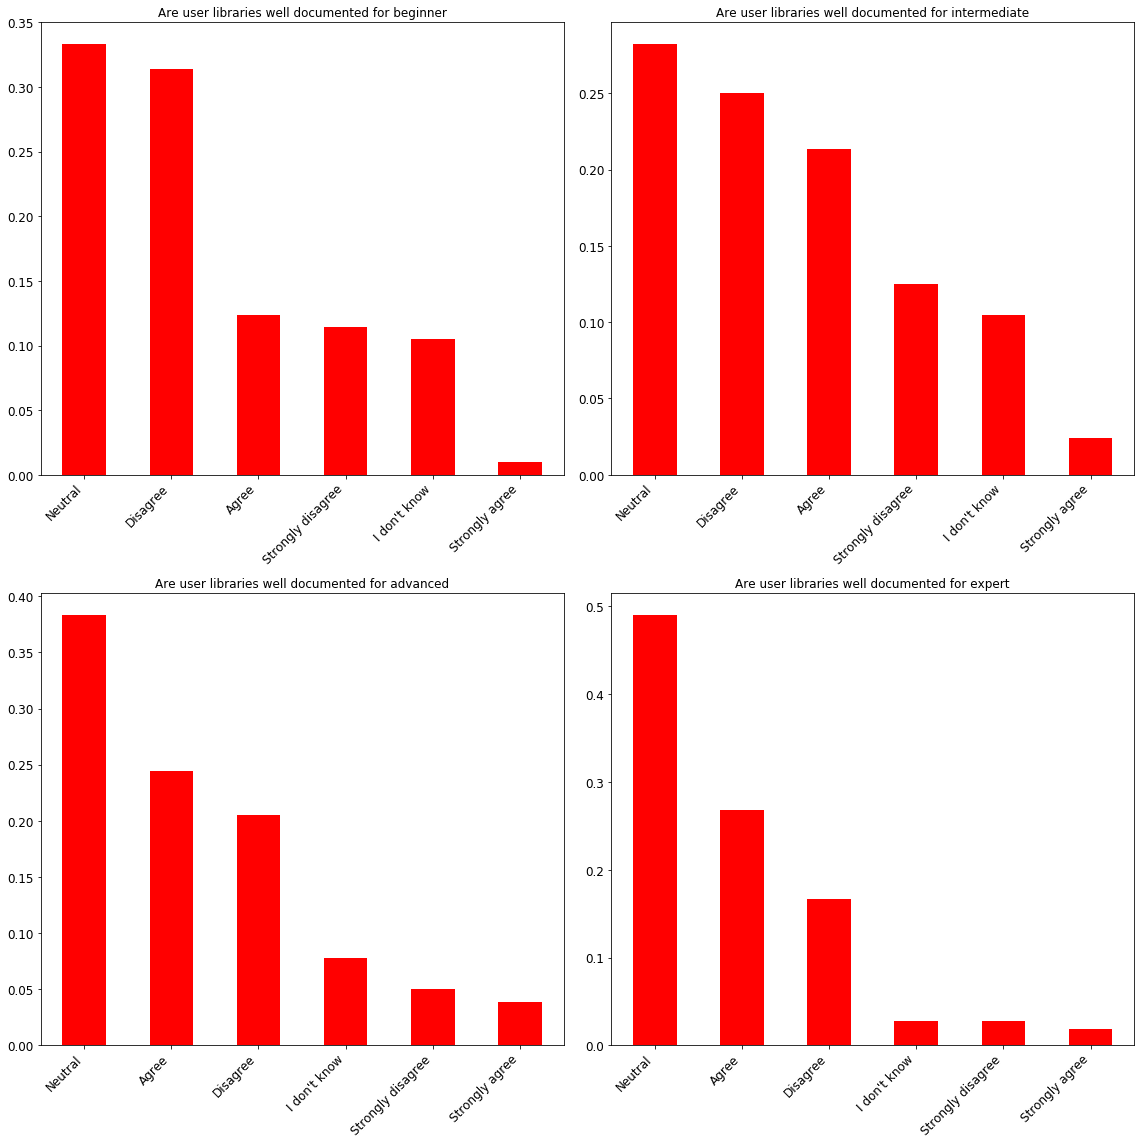

In [9]:
plot(df, proficiency, ["beginner", "intermediate", "advanced", "expert"], lib_doc, "Are user libraries well documented for ", ylabel="")

Hmm, yeah. Less proficient OCamlers find documentation worse for libraries. Not many really think they are dreadful nor great. One problem, anecdotally, has been full application-oriented documentation, rather than the API documentation. 

### New Features

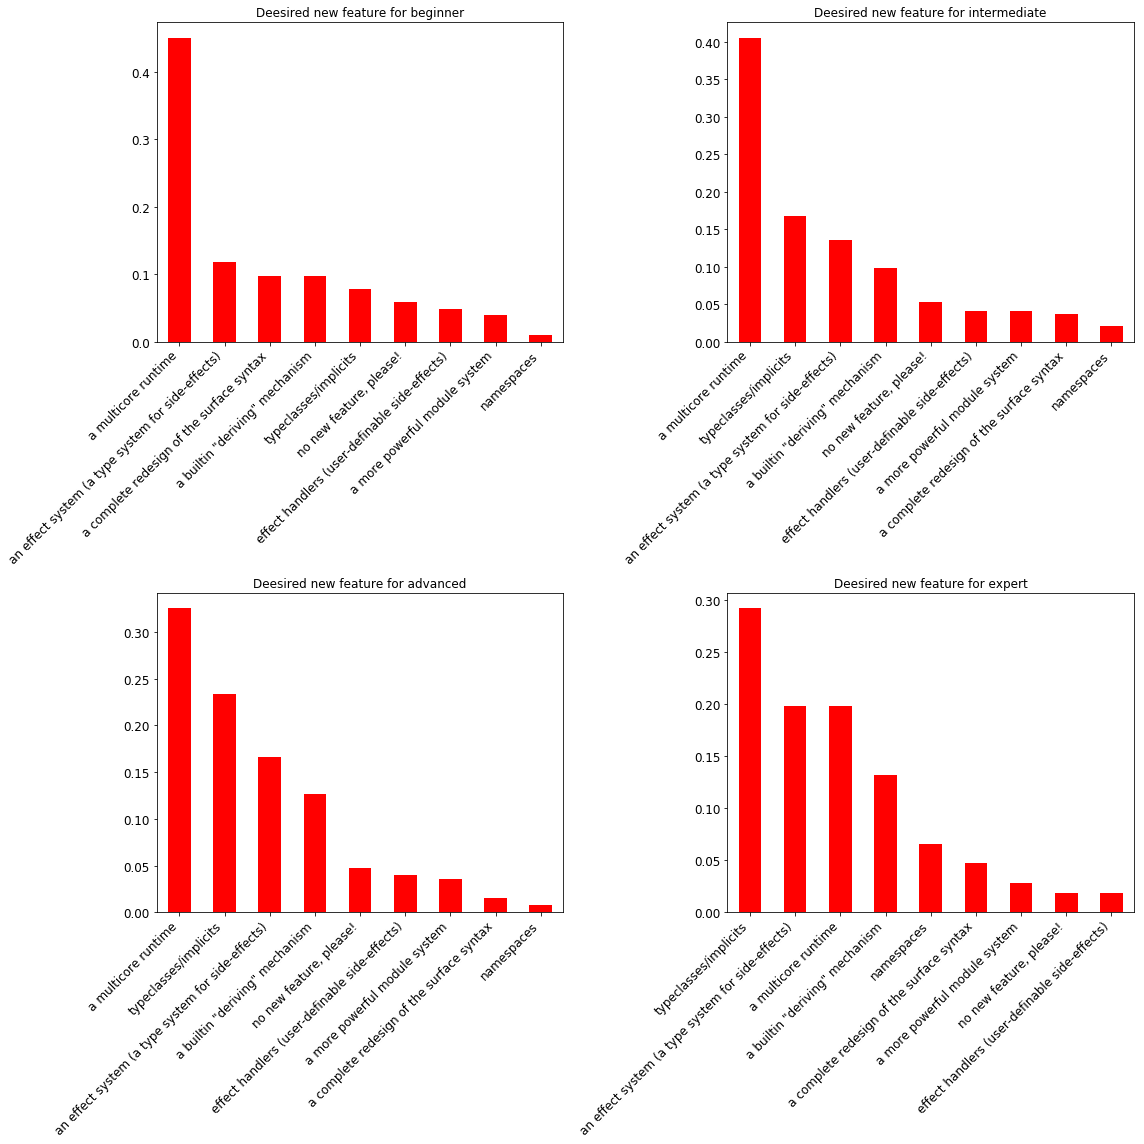

In [10]:
plot(df, proficiency, ["beginner", "intermediate", "advanced", "expert"], new_feature, "Deesired new feature for ", ylabel="", normalize=True)

Well, no real surprises here: 
  - **Everybody wants multi-core!** 
  - Interestingly the top features tend to be the **same across the board** with just there order shifting slightly
  - **Namespaces** seem more desirable amongst the expert community... which makes some sense anecdotally as I'm not entirely sure what they are and would class myself somewhere near beginner and intermediate!

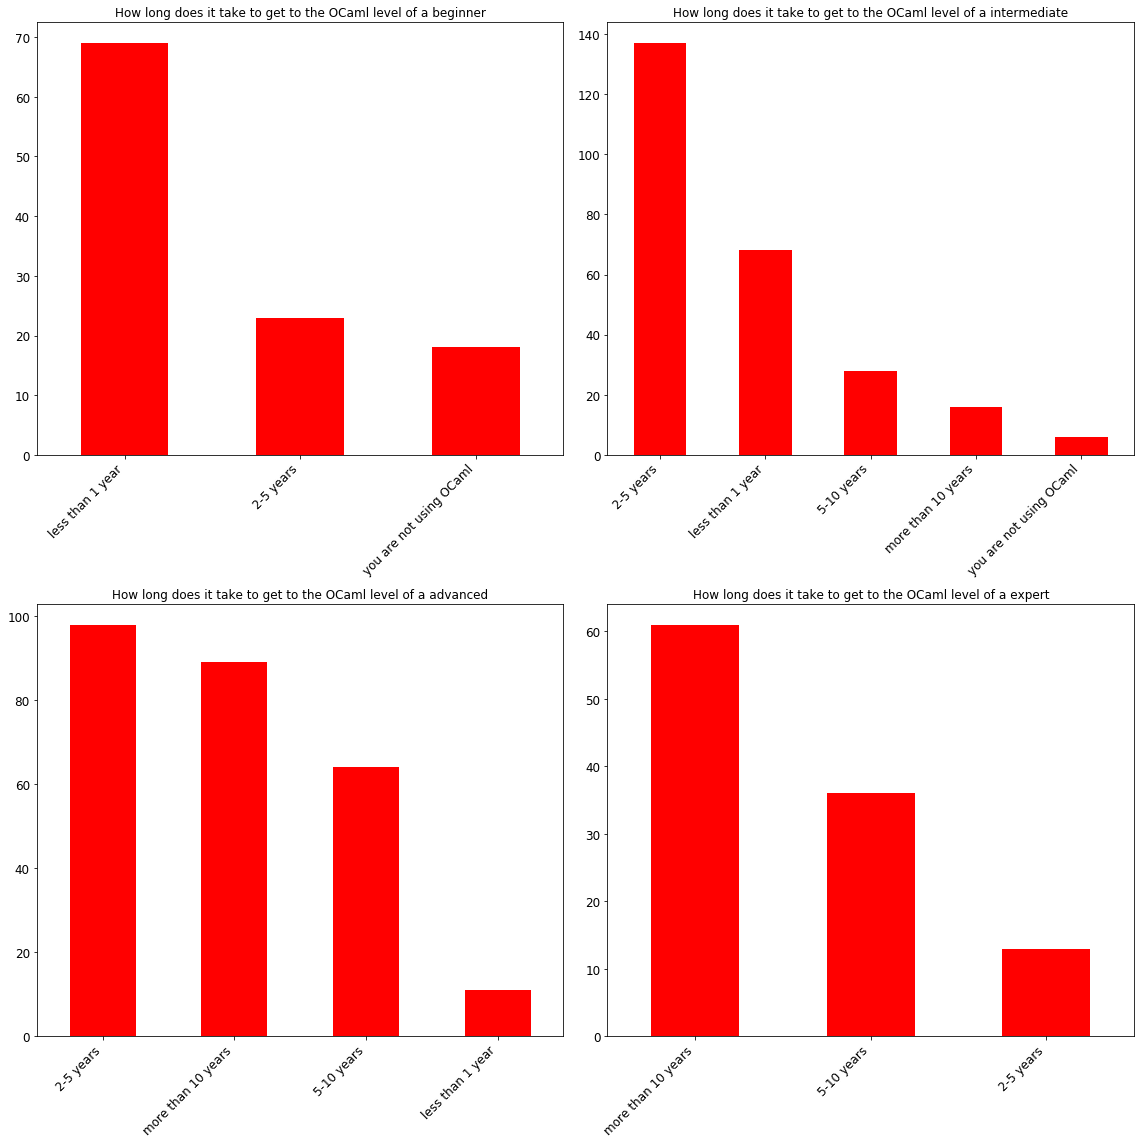

In [11]:
plot(df, proficiency, ["beginner", "intermediate", "advanced", "expert"], years_of_ocaml, "How long does it take to get to the OCaml level of a ", ylabel="", normalize=False)

This interesting plot looks at how long it takes for OCaml developers to reach different stages in proficiency. Of course there is nothing that definitive here because OCaml isn't necessarily the first language of people so they have been using it for 10+ years but are still intermediate (plus the proficiencies are subjective). 

### Fluency in other languages & Application domains

Looking at fluency in other languages might hint at where people have come from and/or what other languages they use in conjuction with OCaml. 

In [12]:
def split_plot(col, new_col_name):
    lists = df[col].str.split(';', expand=True)
    split_df = lists.stack().to_frame().reset_index()
    split_df.columns = ["index", "", new_col_name]
    split_df = split_df.join(df, on="index")
    return split_df 

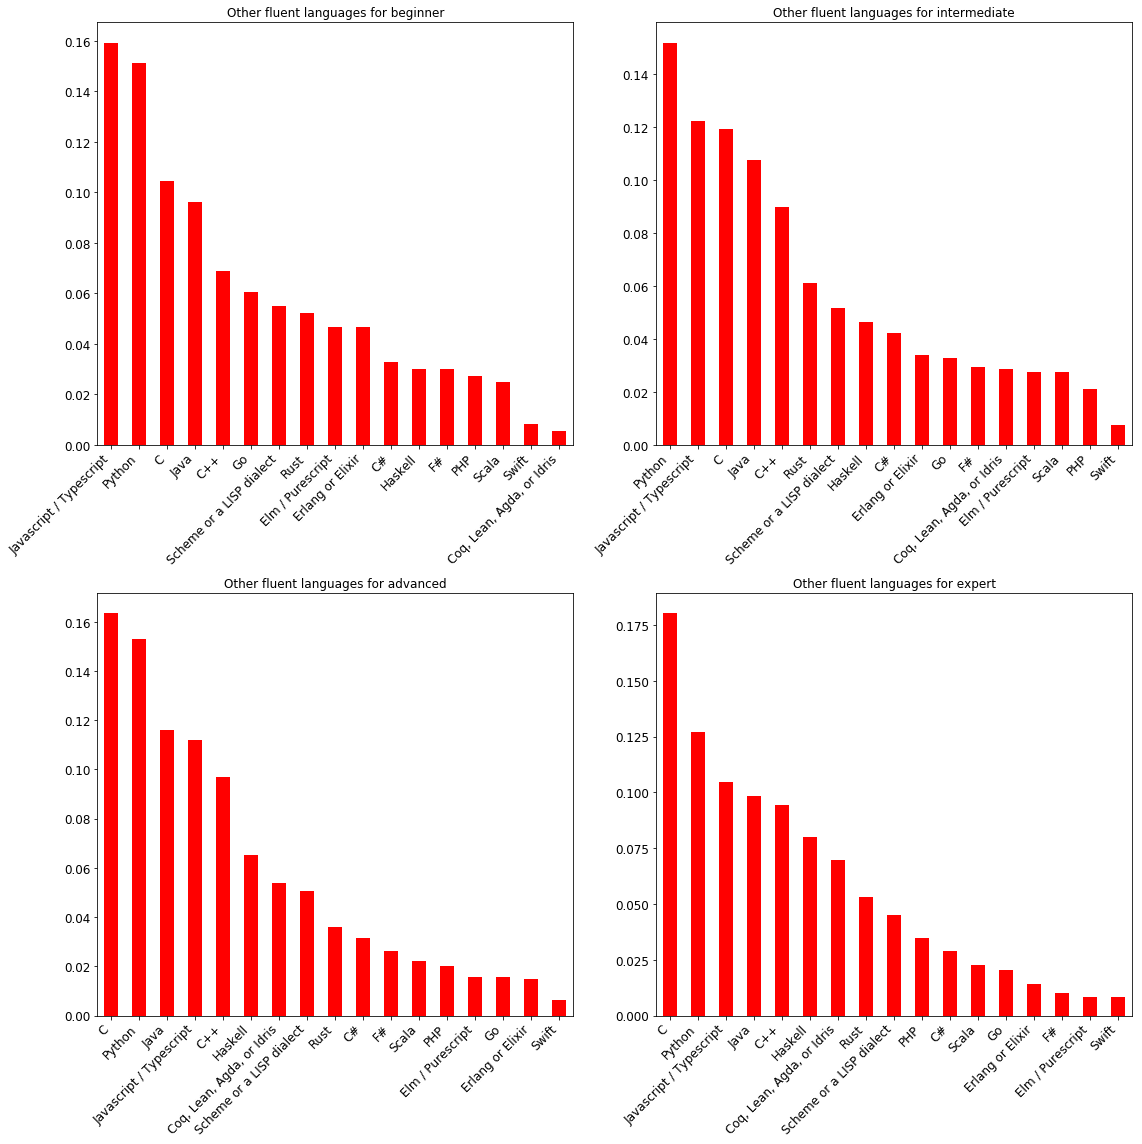

In [13]:
# My lack of pandas and python skills are showing here 
lang_df = split_plot(langs, "languages")
plot(lang_df, proficiency, ["beginner", "intermediate", "advanced", "expert"], "languages", "Other fluent languages for ", ylabel="", normalize=True)



Some intial thoughts:
  - **Coq and friends** progressively move up the chart as a proportion of how many people said it. More formal methods and proof theorem things needed for the less proficient people!
  - **JS, Python and C** battle it out for the top place each time, JS taking it for less proficient (likely younger or with less experience in OCaml) and C for more proficient. 

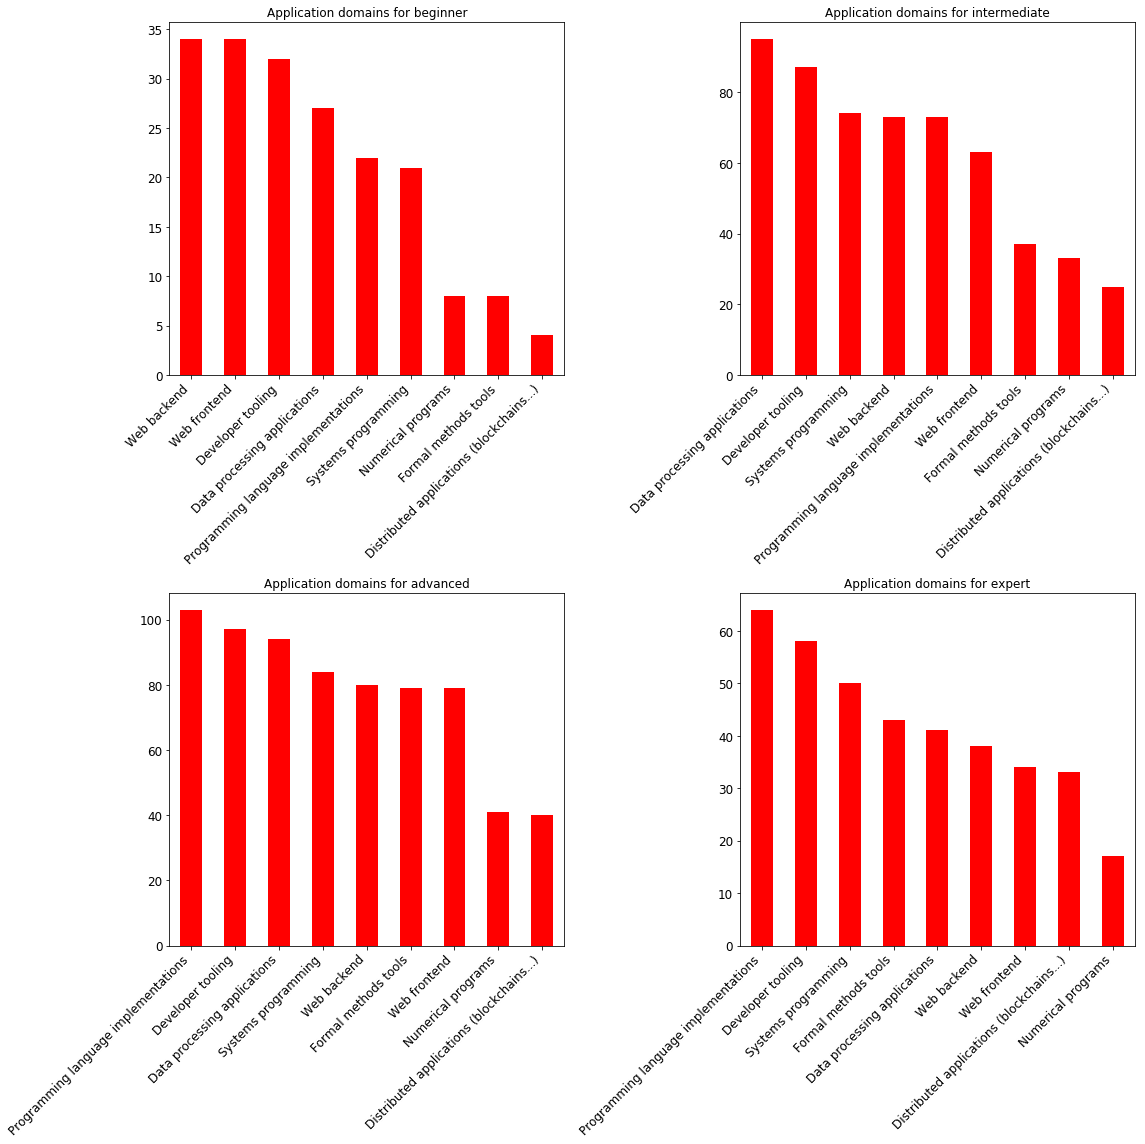

In [14]:
dom_df = split_plot(domains, "domains")
plot(dom_df, proficiency, ["beginner", "intermediate", "advanced", "expert"], "domains", "Application domains for ", ylabel="", normalize=False, drop=3)

A not so surprising pattern emerges here about what the most common applications are: 
  - Amongst less proficient users we see a trend of using OCaml in **web backend & frontend and data processing**
  - More proficient users are using it for **programming language implementations, systems and tooling**
  - **Formal methods** slowly creeps its way upwards as proficiency increases. 
  
This is quite interesting, is this reflect in the years spent using OCaml? 

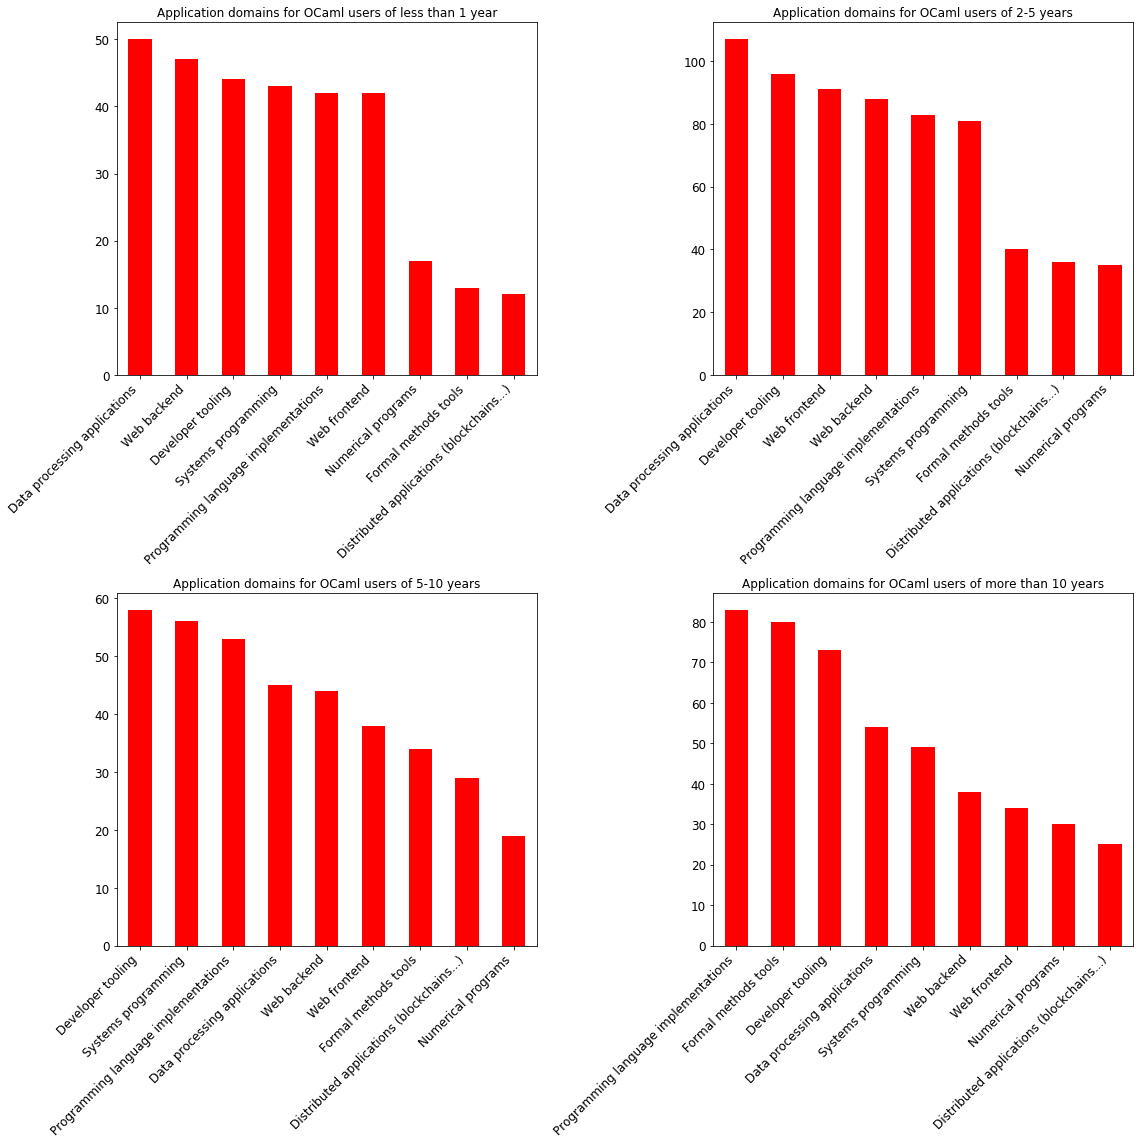

In [15]:
plot(dom_df, years_of_ocaml, year_vals, "domains", "Application domains for OCaml users of ", ylabel="", normalize=False, drop=3)

Hmm kind of. Except now **formal methods** has bubbled much higher to the top. Although hard to say definitively, if at all, there does seem to be a sligh trend that more beginners/people using OCaml for less time have more application domains happening together. 

Also, *web backend* and *web frontend* almost always share the same number of users. This could indicate that people are going the full way and doing **full-stack OCaml** (cf. [discuss thread](https://discuss.ocaml.org/t/your-production-web-stack-in-2020/6691/30)?)

### Installation Method & OCaml Toolchain

Another interesting to look at is how people are installing OCaml, especially the divided between opam and esy. 

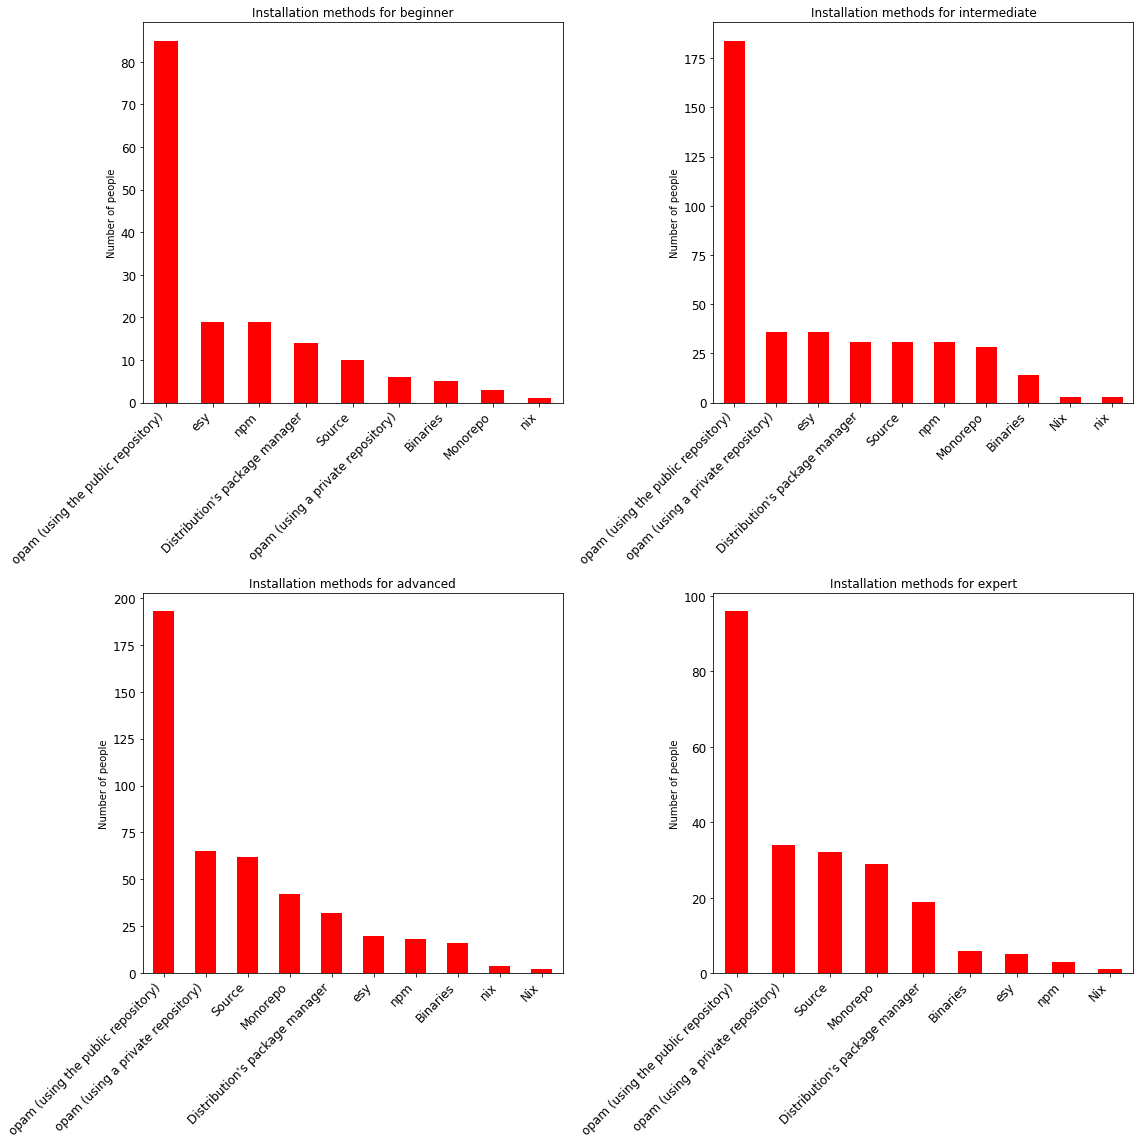

In [16]:
install_df = split_plot(installation, "installation")
plot(install_df, proficiency, ["beginner", "intermediate", "advanced", "expert"], "installation", "Installation methods for ", ylabel="Number of people", normalize=False, drop=3)


As probably suspected, **opam with the public repository** is by far the most used method but some trends seem to be here: 
  - **Esy** (as a proportion of the users) is more popular amongst less proficient. 
  
How does the proficiency impact what implementation they are using, is there a correlation with the application domain and packaging solution?

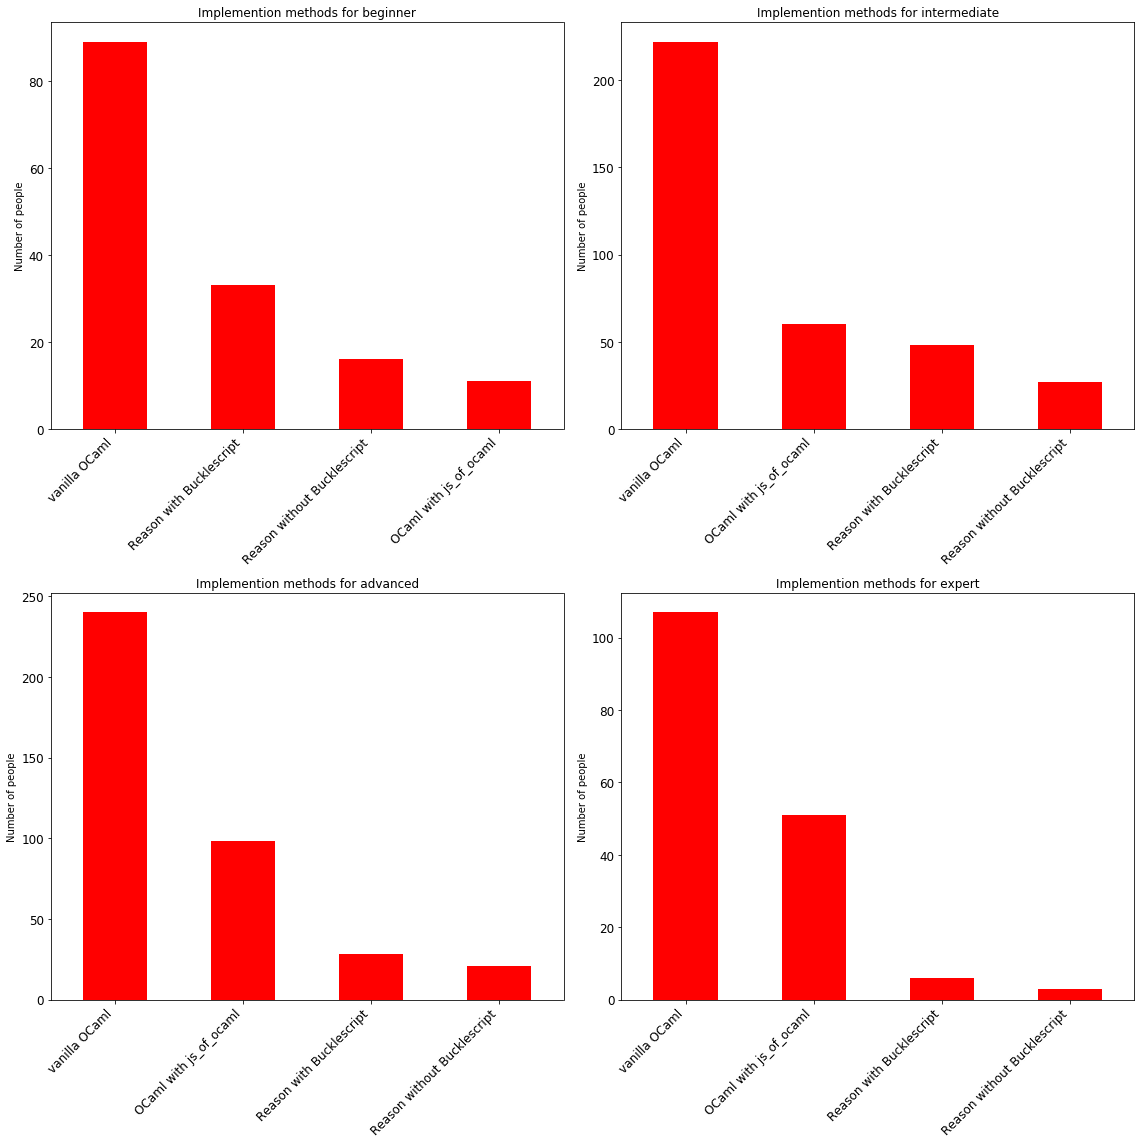

In [17]:
impl_df = split_plot(impl, "implementation")
plot(impl_df, proficiency, ["beginner", "intermediate", "advanced", "expert"], "implementation", "Implemention methods for ", ylabel="Number of people", normalize=False, drop=3)


This is probably quite inline with the application domains of the different users, there is more Reason implementations for beginners who are also building more web-based applications. Interestinly the *Reason* implmentations slip as proficiency rises with `js_of_ocaml` much more prominent for experts. 